# Python Project :

Dataset : IPL data

In [28]:
# Analyse the data and give the answers of below questions :
import pandas as pd
import seaborn as sns
data = pd.read_csv('IPL_Dataset.csv')

In [7]:
data.head(300) # to inspect data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2,1,Mumbai Indians,Rising Pune Supergiant,8,5,N Rana,AT Rayudu,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
296,2,1,Mumbai Indians,Rising Pune Supergiant,8,6,N Rana,AT Rayudu,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
297,2,1,Mumbai Indians,Rising Pune Supergiant,9,1,AT Rayudu,N Rana,A Zampa,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
298,2,1,Mumbai Indians,Rising Pune Supergiant,9,2,N Rana,AT Rayudu,A Zampa,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


1. What is the total number of runs scored by each batting team?

In [4]:
# Group by 'batting_team' and sum the 'total_runs'
total_runs_by_team = data.groupby('batting_team')['total_runs'].sum().reset_index()

# Rename columns for clarity
total_runs_by_team.columns = ['Batting Team', 'Total Runs']

# Display the result
print(total_runs_by_team)


                   Batting Team  Total Runs
0           Chennai Super Kings       20899
1               Deccan Chargers       11463
2              Delhi Daredevils       21953
3                 Gujarat Lions        4862
4               Kings XI Punjab       23068
5          Kochi Tuskers Kerala        1901
6         Kolkata Knight Riders       21965
7                Mumbai Indians       24521
8                 Pune Warriors        6358
9              Rajasthan Royals       17703
10       Rising Pune Supergiant        2470
11      Rising Pune Supergiants        2063
12  Royal Challengers Bangalore       23436
13          Sunrisers Hyderabad       11652


2. How many wides have been bowled by each bowling team?

In [10]:
# Filter out rows where wides were bowled
wides_data = data[data['extra_runs'] > 0]

# Group by 'bowling_team' and count the 'wide_runs'
wides_by_team = wides_data.groupby('bowling_team')['wide_runs'].sum().reset_index()
wides_by_team.columns = ['Bowling Team', 'Wide Runs']
print(wides_by_team)

                   Bowling Team  Wide Runs
0           Chennai Super Kings        526
1               Deccan Chargers        328
2              Delhi Daredevils        614
3                 Gujarat Lions        107
4               Kings XI Punjab        668
5          Kochi Tuskers Kerala         56
6         Kolkata Knight Riders        658
7                Mumbai Indians        786
8                 Pune Warriors        174
9              Rajasthan Royals        586
10       Rising Pune Supergiant         69
11      Rising Pune Supergiants         77
12  Royal Challengers Bangalore        725
13          Sunrisers Hyderabad        268


3. What is the average number of runs scored per inning by each team?

In [11]:
# Group by 'batting_team' and 'match_id', then sum the 'total_runs'
runs_per_inning = data.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()

# Calculate average runs per inning for each team
average_runs_per_inning = runs_per_inning.groupby('batting_team')['total_runs'].mean().reset_index()
average_runs_per_inning.columns = ['Batting Team', 'Average Runs Per Inning']
print(average_runs_per_inning)

                   Batting Team  Average Runs Per Inning
0           Chennai Super Kings               158.325758
1               Deccan Chargers               152.840000
2              Delhi Daredevils               148.331081
3                 Gujarat Lions               156.838710
4               Kings XI Punjab               153.786667
5          Kochi Tuskers Kerala               135.785714
6         Kolkata Knight Riders               146.433333
7                Mumbai Indians               155.196203
8                 Pune Warriors               141.288889
9              Rajasthan Royals               147.525000
10       Rising Pune Supergiant               154.375000
11      Rising Pune Supergiants               147.357143
12  Royal Challengers Bangalore               152.181818
13          Sunrisers Hyderabad               151.324675


4. Which batsman has scored the highest number of runs?

In [14]:
# Group by 'batsman' and sum the 'batsman_runs'
runs_by_batsman = data.groupby('batsman')['batsman_runs'].sum().reset_index()

# Find the batsman with the highest runs
top_batsman = runs_by_batsman.loc[runs_by_batsman['batsman_runs'].idxmax()]
print(top_batsman)

batsman         SK Raina
batsman_runs        4548
Name: 374, dtype: object


5. How many dismissals have occurred of each dismissal kind?

In [16]:
# Filter out rows where a player was dismissed
dismissals = data[data['player_dismissed'].notna()]

# Group by 'dismissal_kind' and count occurrences
dismissals_by_kind = dismissals['dismissal_kind'].value_counts().reset_index()
dismissals_by_kind.columns = ['Dismissal Kind', 'Count']
print(dismissals_by_kind)

          Dismissal Kind  Count
0                 caught   4373
1                 bowled   1382
2                run out    755
3                    lbw    455
4                stumped    243
5      caught and bowled    211
6           retired hurt      9
7             hit wicket      9
8  obstructing the field      1


6. What is the total runs scored by each over?

In [17]:
# Group by 'over' and sum the 'total_runs'
runs_by_over = data.groupby('over')['total_runs'].sum().reset_index()
runs_by_over.columns = ['Over', 'Total Runs']
print(runs_by_over)

    Over  Total Runs
0      1        7733
1      2        8993
2      3        9852
3      4       10207
4      5       10227
5      6       10397
6      7        8413
7      8        8966
8      9        9247
9     10        9047
10    11        9456
11    12        9694
12    13        9713
13    14        9900
14    15       10240
15    16       10397
16    17       10817
17    18       10899
18    19       10469
19    20        9647


7. Which bowler has taken the most wickets?

In [18]:
# Filter out rows where a player was dismissed
wickets = data[data['player_dismissed'].notna()]

# Group by 'bowler' and count dismissals
wickets_by_bowler = wickets.groupby('bowler')['player_dismissed'].count().reset_index()
wickets_by_bowler.columns = ['Bowler', 'Wickets']

# Find the bowler with the most wickets
top_bowler = wickets_by_bowler.loc[wickets_by_bowler['Wickets'].idxmax()]
print(top_bowler)

Bowler     SL Malinga
Wickets           170
Name: 259, dtype: object


8. How many super overs have been played in total?

In [19]:
# Count rows where 'is_super_over' is 1
super_overs_count = data[data['is_super_over'] == 1]['match_id'].nunique()
print(f'Total Super Overs: {super_overs_count}')

Total Super Overs: 7


9. What is the average number of extras (wide runs, bye runs, legbye runs, noball runs, penalty runs) conceded per inning by each bowling team?

In [20]:
# Calculate total extras
data['total_extras'] = data[['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs']].sum(axis=1)

# Group by 'match_id', 'inning', 'bowling_team' and sum the 'total_extras'
extras_per_inning = data.groupby(['match_id', 'inning', 'bowling_team'])['total_extras'].sum().reset_index()

# Calculate average extras per inning for each bowling team
average_extras_per_inning = extras_per_inning.groupby('bowling_team')['total_extras'].mean().reset_index()
average_extras_per_inning.columns = ['Bowling Team', 'Average Extras Per Inning']
print(average_extras_per_inning)

                   Bowling Team  Average Extras Per Inning
0           Chennai Super Kings                   7.590909
1               Deccan Chargers                   8.786667
2              Delhi Daredevils                   8.074830
3                 Gujarat Lions                   6.064516
4               Kings XI Punjab                   8.200000
5          Kochi Tuskers Kerala                   7.857143
6         Kolkata Knight Riders                   8.026667
7                Mumbai Indians                   8.841772
8                 Pune Warriors                   7.282609
9              Rajasthan Royals                   8.743802
10       Rising Pune Supergiant                   6.937500
11      Rising Pune Supergiants                   7.714286
12  Royal Challengers Bangalore                   8.555556
13          Sunrisers Hyderabad                   6.324675


10. How many runs have been scored by each batsman-bowler pair?

In [21]:
# Group by 'batsman' and 'bowler', and sum the 'batsman_runs'
runs_by_pair = data.groupby(['batsman', 'bowler'])['batsman_runs'].sum().reset_index()
runs_by_pair.columns = ['Batsman', 'Bowler', 'Total Runs']
print(runs_by_pair)

              Batsman           Bowler  Total Runs
0      A Ashish Reddy          A Nehra           7
1      A Ashish Reddy         AB Dinda           9
2      A Ashish Reddy       AD Mathews          25
3      A Ashish Reddy       AD Russell           4
4      A Ashish Reddy    Anureet Singh           2
...               ...              ...         ...
17146          Z Khan        SR Watson           3
17147          Z Khan  Shakib Al Hasan           3
17148          Z Khan    Sohail Tanvir           3
17149          Z Khan        VRV Singh           0
17150          Z Khan        YK Pathan           1

[17151 rows x 3 columns]


11. What is the most common dismissal kind?

In [22]:
# Count occurrences of each dismissal kind
most_common_dismissal = dismissals['dismissal_kind'].value_counts().idxmax()
print(f'Most Common Dismissal: {most_common_dismissal}')

Most Common Dismissal: caught


12. How many matches have been played by each batting team?

In [23]:
# Group by 'batting_team' and count unique 'match_id'
matches_by_team = data.groupby('batting_team')['match_id'].nunique().reset_index()
matches_by_team.columns = ['Batting Team', 'Matches Played']
print(matches_by_team)

                   Batting Team  Matches Played
0           Chennai Super Kings             131
1               Deccan Chargers              75
2              Delhi Daredevils             147
3                 Gujarat Lions              30
4               Kings XI Punjab             148
5          Kochi Tuskers Kerala              14
6         Kolkata Knight Riders             148
7                Mumbai Indians             157
8                 Pune Warriors              45
9              Rajasthan Royals             117
10       Rising Pune Supergiant              16
11      Rising Pune Supergiants              14
12  Royal Challengers Bangalore             152
13          Sunrisers Hyderabad              76


13. What is the average number of runs scored in each over?

In [24]:
# Group by 'match_id', 'inning', 'over' and sum the 'total_runs'
runs_per_over = data.groupby(['match_id', 'inning', 'over'])['total_runs'].sum().reset_index()

# Calculate average runs per over
average_runs_per_over = runs_per_over.groupby('over')['total_runs'].mean().reset_index()
average_runs_per_over.columns = ['Over', 'Average Runs']
print(average_runs_per_over)

    Over  Average Runs
0      1      6.022586
1      2      7.081102
2      3      7.763593
3      4      8.043341
4      5      8.059102
5      6      8.212480
6      7      6.661124
7      8      7.098971
8      9      7.356404
9     10      7.197295
10    11      7.564800
11    12      7.798874
12    13      7.852061
13    14      8.035714
14    15      8.448845
15    16      8.715004
16    17      9.253208
17    18      9.594190
18    19      9.684551
19    20      9.965909


14. Which fielder has been involved in the most dismissals?

In [31]:
# Filter out rows where a player was dismissed and 'fielder' is not NaN
dismissals_with_fielder = dismissals[dismissals['fielder'].notna()]

# Group by 'fielder' and count occurrences
dismissals_by_fielder = dismissals_with_fielder['fielder'].value_counts().reset_index()
dismissals_by_fielder.columns = ['Fielder', 'Dismissals']
top_fielder = dismissals_by_fielder.loc[dismissals_by_fielder['Dismissals'].idxmax()]
print(top_fielder)

Fielder       KD Karthik
Dismissals           127
Name: 0, dtype: object


15. How does the number of runs scored vary with the over number?

In [32]:
# Group by 'over' and sum the 'total_runs'
runs_by_over = data.groupby('over')['total_runs'].sum().reset_index()
runs_by_over.columns = ['Over', 'Total Runs']
print(runs_by_over)

    Over  Total Runs
0      1        7733
1      2        8993
2      3        9852
3      4       10207
4      5       10227
5      6       10397
6      7        8413
7      8        8966
8      9        9247
9     10        9047
10    11        9456
11    12        9694
12    13        9713
13    14        9900
14    15       10240
15    16       10397
16    17       10817
17    18       10899
18    19       10469
19    20        9647


16. how is the relationship between the number of runs scored and the number of extras conceded?

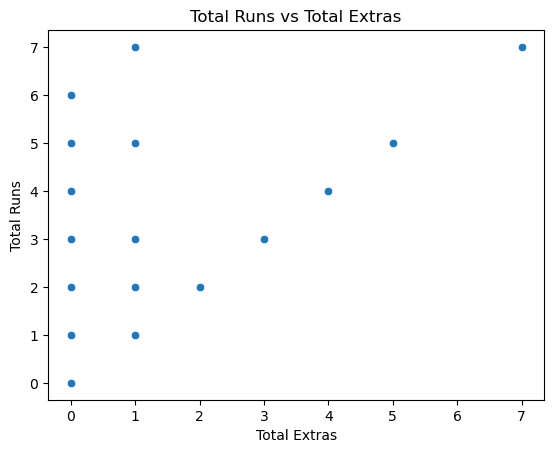

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total extras
data['total_extras'] = data[['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs']].sum(axis=1)

# Scatter plot of total runs vs total extras
sns.scatterplot(x='total_extras', y='total_runs', data=data)
plt.title('Total Runs vs Total Extras')
plt.xlabel('Total Extras')
plt.ylabel('Total Runs')
plt.show()

17. Are there any notable trends in the distribution of runs scored by batting teams across innings?

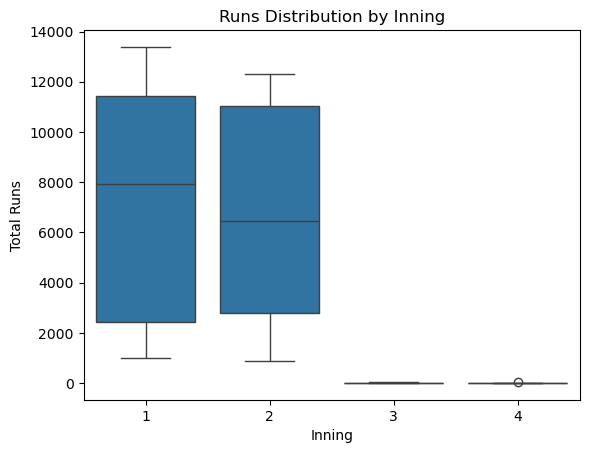

In [30]:
# Group by 'batting_team' and 'inning', and sum the 'total_runs'
runs_by_inning = data.groupby(['batting_team', 'inning'])['total_runs'].sum().reset_index()

# Boxplot of runs by inning
sns.boxplot(x='inning', y='total_runs', data=runs_by_inning)
plt.title('Runs Distribution by Inning')
plt.xlabel('Inning')
plt.ylabel('Total Runs')
plt.show()

18. Which batting team has the highest average runs per match?

In [33]:
# Group by 'match_id', 'batting_team' and sum the 'total_runs'
runs_per_match = data.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Calculate average runs per match for each team
average_runs_per_match = runs_per_match.groupby('batting_team')['total_runs'].mean().reset_index()
average_runs_per_match.columns = ['Batting Team', 'Average Runs Per Match']
top_team = average_runs_per_match.loc[average_runs_per_match['Average Runs Per Match'].idxmax()]
print(top_team)

Batting Team              Gujarat Lions
Average Runs Per Match       162.066667
Name: 3, dtype: object


19. What is the total runs scored by each batsman?

In [34]:
# Group by 'batsman' and sum the 'batsman_runs'
total_runs_by_batsman = data.groupby('batsman')['batsman_runs'].sum().reset_index()
total_runs_by_batsman.columns = ['Batsman', 'Total Runs']
print(total_runs_by_batsman)

            Batsman  Total Runs
0    A Ashish Reddy         280
1        A Chandila           4
2          A Chopra          53
3       A Choudhary          25
4        A Flintoff          62
..              ...         ...
456     YV Takawale         192
457   Yashpal Singh          47
458     Younis Khan           3
459    Yuvraj Singh        2591
460          Z Khan         117

[461 rows x 2 columns]


20. How does the average number of runs scored per inning vary across different bowling teams?

In [35]:
# Group by 'match_id', 'inning', 'bowling_team' and sum the 'total_runs'
runs_per_inning_against_team = data.groupby(['match_id', 'inning', 'bowling_team'])['total_runs'].sum().reset_index()

# Calculate average runs per inning against each bowling team
average_runs_against_team = runs_per_inning_against_team.groupby('bowling_team')['total_runs'].mean().reset_index()
average_runs_against_team.columns = ['Bowling Team', 'Average Runs Per Inning']
print(average_runs_against_team)

                   Bowling Team  Average Runs Per Inning
0           Chennai Super Kings               149.924242
1               Deccan Chargers               154.906667
2              Delhi Daredevils               151.993197
3                 Gujarat Lions               164.193548
4               Kings XI Punjab               155.133333
5          Kochi Tuskers Kerala               141.857143
6         Kolkata Knight Riders               146.900000
7                Mumbai Indians               150.854430
8                 Pune Warriors               149.065217
9              Rajasthan Royals               147.553719
10       Rising Pune Supergiant               152.250000
11      Rising Pune Supergiants               150.928571
12  Royal Challengers Bangalore               154.392157
13          Sunrisers Hyderabad               148.896104


21. how is the relationship between the number of wides and the number of no balls bowled?

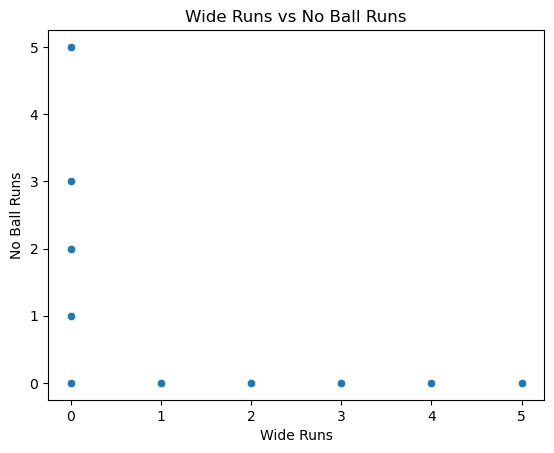

In [37]:
# Scatter plot of wide runs vs no ball runs
sns.scatterplot(x='wide_runs', y='noball_runs', data=data)
plt.title('Wide Runs vs No Ball Runs')
plt.xlabel('Wide Runs')
plt.ylabel('No Ball Runs')
plt.show()

22. Which batting team has the highest number of centuries?

In [50]:
# Assuming data is already loaded into DataFrame 'data'
# Filter out rows where batsman scored 100 or more in a single inning
centuries = data[data['batsman_runs'] >= 100]

if not centuries.empty:
    # Group by 'batting_team' and count centuries
    centuries_by_team = centuries.groupby('batting_team')['match_id'].count().reset_index()
    centuries_by_team.columns = ['Batting Team', 'Centuries']
    
    if not centuries_by_team.empty:
        top_team_centuries = centuries_by_team.loc[centuries_by_team['Centuries'].idxmax()]
        print(top_team_centuries)
    else:
        print("No team has scored any centuries.")
else:
    print("No centuries were scored.")

No centuries were scored.


23. How does the number of wides vary with the over number?

In [39]:
# Group by 'over' and sum the 'wide_runs'
wides_by_over = data.groupby('over')['wide_runs'].sum().reset_index()
wides_by_over.columns = ['Over', 'Wide Runs']
print(wides_by_over)

    Over  Wide Runs
0      1        481
1      2        442
2      3        359
3      4        295
4      5        279
5      6        307
6      7        330
7      8        261
8      9        255
9     10        227
10    11        182
11    12        220
12    13        241
13    14        224
14    15        248
15    16        254
16    17        264
17    18        271
18    19        264
19    20        238


24. What is the average number of runs scored per inning in matches with a super over?

In [49]:
# Filter out rows where 'is_super_over' is 1
super_over_matches = data[data['is_super_over'] == 1]['match_id'].unique()

# Calculate total runs in super over matches
runs_in_super_over_matches = data[data['match_id'].isin(super_over_matches)]

# Group by 'match_id', 'inning' and sum the 'total_runs'
runs_per_inning_super_over = runs_in_super_over_matches.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()

# Calculate average runs per inning in super over matches
average_runs_per_inning_super_over = runs_per_inning_super_over['total_runs'].mean()
print(f'Average Runs Per Inning in Super Over Matches: {average_runs_per_inning_super_over}')

Average Runs Per Inning in Super Over Matches: 82.17857142857143


25. How does the number of extras vary with the over number?

In [48]:
# Group by 'over' and sum the 'total_extras'
extras_by_over = data.groupby('over')['total_extras'].sum().reset_index()
extras_by_over.columns = ['Over', 'Total Extras']
print(extras_by_over)

    Over  Total Extras
0      1           768
1      2           730
2      3           629
3      4           562
4      5           495
5      6           582
6      7           553
7      8           465
8      9           459
9     10           437
10    11           379
11    12           395
12    13           451
13    14           426
14    15           425
15    16           458
16    17           548
17    18           531
18    19           527
19    20           565


26. Which bowler has the highest economy rate?

In [47]:
# Calculate runs conceded by each bowler
runs_conceded_by_bowler = data.groupby('bowler')['total_runs'].sum().reset_index()

# Calculate balls bowled by each bowler
balls_bowled_by_bowler = data.groupby('bowler')['ball'].count().reset_index()

# Merge the dataframes
bowler_stats = pd.merge(runs_conceded_by_bowler, balls_bowled_by_bowler, on='bowler')
bowler_stats.columns = ['Bowler', 'Runs Conceded', 'Balls Bowled']

# Calculate economy rate (runs per over)
bowler_stats['Economy Rate'] = bowler_stats['Runs Conceded'] / (bowler_stats['Balls Bowled'] / 6)

# Find the bowler with the highest economy rate
highest_economy_bowler = bowler_stats.loc[bowler_stats['Economy Rate'].idxmax()]
print(highest_economy_bowler)

Bowler           I Malhotra
Runs Conceded            23
Balls Bowled              6
Economy Rate           23.0
Name: 120, dtype: object


27. How does the number of dismissals vary across different dismissal kinds?

In [43]:
# Count occurrences of each dismissal kind
dismissal_variation = dismissals['dismissal_kind'].value_counts().reset_index()
dismissal_variation.columns = ['Dismissal Kind', 'Count']
print(dismissal_variation)

          Dismissal Kind  Count
0                 caught   4373
1                 bowled   1382
2                run out    755
3                    lbw    455
4                stumped    243
5      caught and bowled    211
6           retired hurt      9
7             hit wicket      9
8  obstructing the field      1


28. What is the distribution of runs scored by each batting team in super overs?

In [46]:
# Filter out rows where 'is_super_over' is 1
super_over_runs = data[data['is_super_over'] == 1]

# Group by 'batting_team' and sum the 'total_runs'
super_over_runs_by_team = super_over_runs.groupby('batting_team')['total_runs'].sum().reset_index()
super_over_runs_by_team.columns = ['Batting Team', 'Total Runs']
print(super_over_runs_by_team)

                  Batting Team  Total Runs
0          Chennai Super Kings           9
1             Delhi Daredevils          11
2                Gujarat Lions           6
3              Kings XI Punjab          25
4        Kolkata Knight Riders          26
5               Mumbai Indians          11
6             Rajasthan Royals          35
7  Royal Challengers Bangalore          30
8          Sunrisers Hyderabad          20
